In [481]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

***Getting the data***

In [482]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
passenger_id = test_df['PassengerId']
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***Getting the data***

We have multiple objects data type like Name, Sex, Cabin and Embarked

In [483]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

***Dicovering the Null values in both Test and Trian***

In [484]:
print(train_df.isna().sum())
print('_'*40)
print(test_df.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**What unnecessarily features that we need to drop from our data set?**

Looking at our dataset we discoverd that.

- PassengerId is just an index for the dataset
- Cabin column is full of Nan values.
- Name and Ticket Number columns wont provide us much information regarding either the person survived or not.

So we decided to drop these 4 columns

In [485]:
train_df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)
test_df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)

##***Data Wrangling***


*Transomaring Sex from object to int*

In [486]:
# Transforming the Sex table from being object to be binary
# male = 1 and female = 0
train_df['Sex'] = pd.get_dummies(train_df['Sex'],drop_first=True).astype(int)
test_df['Sex'] = pd.get_dummies(test_df['Sex'],drop_first=True).astype(int)

*Filling the missing values from Embarked*

In [487]:
# Filling the missing values from the Embarked the most frequent character
most_frequent_train = train_df['Embarked'].mode()
train_df['Embarked'] = train_df['Embarked'].fillna(most_frequent[0])


*Filling the missing value in Fare for the Test set*

In [488]:
fare_mean_test = test_df['Fare'].mean()
test_df['Fare'] = test_df['Fare'].fillna(fare_mean_test).astype('float64')

*Transomaring Embarked from object to int*

In [489]:
#Changing the values of Embarked from categorical to numerical
mapper = {'S':1,'C':2,'Q':3}
train_df['Embarked'] = train_df['Embarked'].map( mapper).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( mapper).astype(int)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1
887,1,1,0,19.0,0,0,30.0000,1
888,0,3,0,NaN,1,2,23.4500,1
889,1,1,1,26.0,0,0,30.0000,2


***Using KKN Imputer to fill the missing values of Age***

In [490]:
# using KnnImputer to calculate the missing values for age
knnImputer = KNNImputer(n_neighbors=5)

# for the training set
train_imputed = knnImputer.fit_transform(train_df.values)
train_df = pd.DataFrame(train_imputed, columns=train_df.columns)

# for the test set
test_imputed = knnImputer.fit_transform(test_df.values)
test_df = pd.DataFrame(test_imputed, columns=test_df.columns)


***Transforming the age from Numerical values to catagorical values***

<Axes: xlabel='Age', ylabel='Count'>

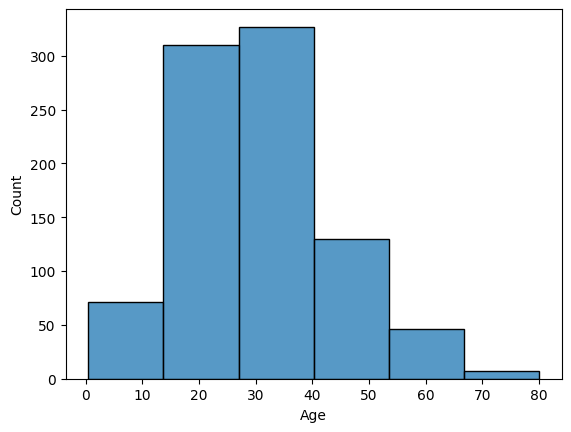

In [491]:
# ploting age histogram of 4 bins to see the perfect values to transform the age from numerical to catagroical
sns.histplot(data=train_df, x="Age", bins=6)


In [492]:
age_categories = [(0, 12), (13, 18), (19, 30), (31, 50), (51, 100)]

age_labels = [1, 2, 3, 5,5]

# Create a new column 'AgeCategory' and initialize it with 'Unknown'
train_df['AgeCategory'] = 0
test_df['AgeCategory'] = 0

# Iterate over each age category and assign the corresponding label
for category, label in zip(age_categories, age_labels):
    min_age, max_age = category
    train_df.loc[(train_df['Age'] >= min_age) & (train_df['Age'] <= max_age), 'AgeCategory'] = label

for category, label in zip(age_categories, age_labels):
    min_age, max_age = category
    test_df.loc[(train_df['Age'] >= min_age) & (test_df['Age'] <= max_age), 'AgeCategory'] = label



In [493]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test  = test_df.copy()

***Data Normalization by using Z-score***


In [494]:
#Feature Normalization
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train.values)
X_test  = standardScaler.fit_transform(X_test.values)

###***Models evaluations***

In [495]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, Y_train)

Y_pred_RF= random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

acc_random_forest = random_forest.score(X_train, Y_train)
acc_random_forest

0.9887766554433222

In [496]:
# Decision_tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, Y_train)
acc_decision_tree

0.9887766554433222

In [497]:
# Logistic_regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_train, Y_train)
acc_log

0.8080808080808081

In [498]:
# Gaussian_Naive_Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_train, Y_train)
acc_gaussian

0.7934904601571269

In [499]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [ acc_log, acc_random_forest,
              acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.988777
3,Decision Tree,0.988777
0,Logistic Regression,0.808081
2,Naive Bayes,0.793490


In [502]:
submission = pd.DataFrame({
        "PassengerId": passenger_id,
        "Survived": Y_pred_RF
    })
submission.to_csv('/submission.csv',index=False)